# Understanding the Strategy of a Simple Neural Network

## Abstract
In this Jupyter notebook an attempt is made to uncover the strategy of a simple neural network that is trained for classifying rotating squares and triangles (of the same size). To that end, a symbolic representative of the neural network is being studied.

## About the Study
The neural network that is being studied is from `\models\nn_Linear_1024_2_Rect_Linear_2_2_SoftMax_(batchsize_10_number_iterations_10000).txt`. For more details about this particular neural network see the corresponding log file. In `understanding_nn.py` we generated and tested a sympy representative for the neural network that is much easier to study. 

There are two possible shapes: squares and triangles. In the following, we assume that the shape color is given by $x \in [0, 1]$ and the background is given by color $y \in [0, 1]$. So if you would give the shape and the colors $x$ and $y$ we can approximately reproduce the picture except for the correct rotation. In `understanding_nn.py` we averaged over the rotation possibilities to obtain a symbolic representation.

In the following script the symbolic representations are loaded for the squares and triangles, resp., with colors $x$ and $y$. Afterwards, the representations are printed. Small comment: I did not apply the softmax layer for simplicity. Note that due to the monotonicity of the softmax layer, a relatively large value from the last layer means a relatively large probability (and vice versa).

In [109]:
import os
import pickle
import numpy as np
from IPython.display import display
from sympy import init_printing
init_printing(use_latex=True)

# load neural network representation for square and triangle, resp.
root = os.path.dirname(os.getcwd())

# square (Sq)
fileNameNNReprSq = root + r'\results\sympyRepresentationOutputLayer3SqNN.pickle'
with open(fileNameNNReprSq, 'rb') as handle:
    nnReprSq = pickle.load(handle)
    
# triangle (Tr)
fileNameNNReprTr = root + r'\results\sympyRepresentationOutputLayer3TrNN.pickle'
with open(fileNameNNReprTr, 'rb') as handle:
    nnReprTr = pickle.load(handle)  


## Symbolic Representation in case of a Square

In [110]:
print 'Output for square (positively correlated with probability):'
display(nnReprSq[0])
print 'Output for triangle (positively correlated with probability):'
display(nnReprSq[1])

Output for square (positively correlated with probability):


Output for triangle (positively correlated with probability):


## Symbolic Representation in case of a Triangle

In [111]:
print 'Output for square (positively correlated with probability):'
display(nnReprTr[0])
print 'Output for triangle (positively correlated with probability):'
display(nnReprTr[1])

Output for square (positively correlated with probability):


Output for triangle (positively correlated with probability):


## Interpreting the Symbolic Representations

In the following we will demonstrate the symbolic representation for a test image.

### Load the data for illustration purposes.

In [112]:
# I do not want to load the data every time, therefore the if statement

# in order to import a package in parent folder
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
import tools, settings
from tools import data_loader, data_analysis, model_io

if 'X' not in locals():
    # load data
    X, Y = data_loader.load_data()

Chosen test image with classification: [0. 1.]
Note [1, 0] = square and [0, 1] = triangle.


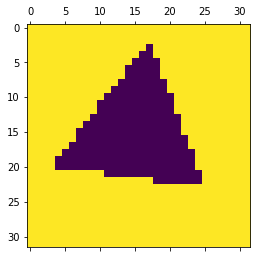

In [113]:
# get a test image (im) with known classification
imageIdx = 0
im = X['train'][[imageIdx]]
classification = Y['train'][[imageIdx]]

# determine index of a color in shape and background
idxShapeColor = np.ravel_multi_index([16, 16], (32, 32))
idxBackgroundColor = 0

# report on chosen image
print 'Chosen test image with classification: {}'.format(classification[0])
print 'Note [1, 0] = square and [0, 1] = triangle.'
tools.data_analysis.plot_vector_as_image(im)


### Evaluate image `im` with the neural network

In [114]:
# load trained neural network (nn)
nnName = 'nn_Linear_1024_2_Rect_Linear_2_2_SoftMax_(batchsize_10_number_iterations_10000).txt'
nn = model_io.read(r'' + parent_dir.replace('\\', '/') + '/' + settings.modelPath + nnName)

# nn prediction (nnPred)
nnPred = nn.forward(im)
layerOutcome = [nn.modules[0].forward(im)]
for i in range(1, len(nn.modules)):
    layerOutcome.append(nn.modules[i].forward(layerOutcome[-1]))
print '\n The probabilities of a square and triangle according to neural network:'
print layerOutcome[-1]

loading plain text model from C:/Users/berkhout/Desktop/XAI/Software/Python/SimpleLRPExperiments/models/TrianglesAndSquares/nn_Linear_1024_2_Rect_Linear_2_2_SoftMax_(batchsize_10_number_iterations_10000).txt

 The probabilities of a square and triangle according to neural network:
[[0.07858226 0.92141774]]


### Evaluate image `im` with the sympy representation

In [115]:
# determine index of a color in shape and background
idxShapeColor = np.ravel_multi_index([16, 16], (32, 32))
idxBackgroundColor = 0

# determine color of shape and background
xColor = im[0][idxShapeColor]
yColor = im[0][idxBackgroundColor]

# sympy output: the softmax layer is calculated here
sympyOutputSq = Matrix(1,
                       2,
                       [exp(nnReprSq[0])/(exp(nnReprSq[0]) + exp(nnReprSq[1])),
                        exp(nnReprSq[1])/(exp(nnReprSq[0]) + exp(nnReprSq[1]))])
sympyOutputTr = Matrix(1,
                       2,
                       [exp(nnReprTr[0])/(exp(nnReprTr[0]) + exp(nnReprTr[1])),
                        exp(nnReprTr[1])/(exp(nnReprTr[0]) + exp(nnReprTr[1]))])

if classification[0][0] == 1:
    # square
    sympyPred = np.array(sympyOutputSq.subs([('x', xColor), ('y', yColor)])).astype(np.float64)
else:
    # triangle
    sympyPred = np.array(sympyOutputTr.subs([('x', xColor), ('y', yColor)])).astype(np.float64)

print 'The probabilities according to the symbolic representation are:'
print sympyPred

The probabilities according to the symbolic representation are:
[[0.07866254 0.92133746]]
